In [1]:
#Python program to scrape website 
#and save quotes from website
import requests,csv,nltk,string,itertools
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

C:\Users\almehadi.ali\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


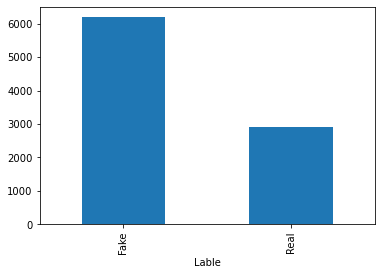

<Figure size 288x288 with 0 Axes>

9108

In [2]:
import pandas as pd
df = pd.read_csv('SomalinewsV3.csv')
    
df['Lable']= df['Lable'].replace(['TRUE'], 'Real')
df['Lable']= df['Lable'].replace(['FALSE'], 'Fake')

df.Lable.value_counts()
df.groupby('Lable').size().plot(kind='bar')

plt.figure(figsize=(4,4));
#plt.hist(df["Lable"])
plt.show()
len(df)

<AxesSubplot:ylabel='None'>

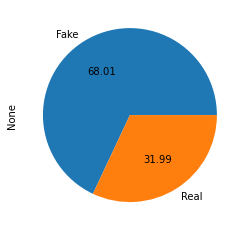

In [3]:
df.groupby('Lable').size().plot(kind='pie', autopct='%.2f')

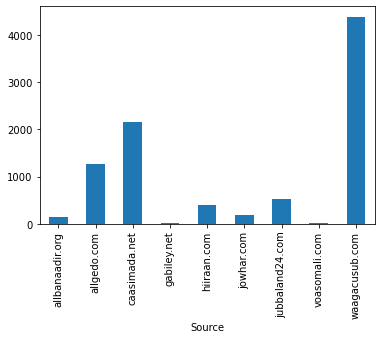

<Figure size 288x288 with 0 Axes>

In [4]:
df.groupby('Source').size().plot(kind='bar')
plt.figure(figsize=(4,4));
#plt.hist(df["Lable"])
#plt.show()


In [5]:
df.Lable.value_counts()

Fake    6194
Real    2914
Name: Lable, dtype: int64

In [6]:
df.shape

(9108, 6)

In [7]:
df.isnull().sum()

Date      391
url         0
title       1
lines       0
Source      0
Lable       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9108 entries, 0 to 9107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    8717 non-null   object
 1   url     9108 non-null   object
 2   title   9107 non-null   object
 3   lines   9108 non-null   object
 4   Source  9108 non-null   object
 5   Lable   9108 non-null   object
dtypes: object(6)
memory usage: 427.1+ KB


In [9]:
df = df.sample(frac = 1)
df.head()

,Date,url,title,lines,Source,Lable
1700,4/8/2017,/article/-sawiro--dab-ka-holcaya-mid-ka-mid-ah...,(SAWIRO) Dab ka Holcaya mid ka mid ah Dhismaya...,Dab wayn ayaa qabsaday dhismo aad u dheer oo k...,jubbaland24.com,Fake
7184,0 \nVisits: 4903 | \r\n ...,https://waagacusub.com/articles/1433/Sirculus-...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,waagacusub.com,Fake
1908,9-Oct-22,https://www.caasimada.net/df-oo-xirtay-dhammaa...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,caasimada.net,Real
508,19-Jul-22,https://www.caasimada.com/ciidamo-ka-tirsan-ho...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,caasimada.net,Real
1358,21/04/2018,/article/-video--maxkamadda-racfaanka-kenya-oo...,(VIDEO) Maxkamadda Racfaanka Kenya oo Sharci D...,Maxkamadda Racfaanka Kenya ayaa ayyiday xukun ...,jubbaland24.com,Fake


In [10]:
df.Lable[df.Lable == 'Real'] = 1
df.Lable[df.Lable == 'Fake'] = 0

In [11]:
df.head()

,Date,url,title,lines,Source,Lable
1700,4/8/2017,/article/-sawiro--dab-ka-holcaya-mid-ka-mid-ah...,(SAWIRO) Dab ka Holcaya mid ka mid ah Dhismaya...,Dab wayn ayaa qabsaday dhismo aad u dheer oo k...,jubbaland24.com,0
7184,0 \nVisits: 4903 | \r\n ...,https://waagacusub.com/articles/1433/Sirculus-...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,waagacusub.com,0
1908,9-Oct-22,https://www.caasimada.net/df-oo-xirtay-dhammaa...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,caasimada.net,1
508,19-Jul-22,https://www.caasimada.com/ciidamo-ka-tirsan-ho...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,caasimada.net,1
1358,21/04/2018,/article/-video--maxkamadda-racfaanka-kenya-oo...,(VIDEO) Maxkamadda Racfaanka Kenya oo Sharci D...,Maxkamadda Racfaanka Kenya ayaa ayyiday xukun ...,jubbaland24.com,0


In [12]:
df.tail()

,Date,url,title,lines,Source,Lable
8411,25-Feb-15,https://www.allgedo.com/2015/02/24/madaxweynah...,Madaxweynaha oo hambalyo u direy Ciidammada As...,"24 Febraayo 2015, Muqdisho: Madaxweynaha Jamhu...",allgedo.com,0
2083,29-Sep-22,https://www.caasimada.net/sawirro-wasiirka-dif...,Sawirro: Wasiirka difaaca iyo taliyaha xoogga ...,Sawirro: Wasiirka difaaca iyo taliyaha xoogga ...,caasimada.net,1
4470,0 \nVisits: 3034 | \r\n ...,https://xushmo.com/?p=4013,[DHAGEYSO XOG:] Yaa Ka Dambeeyay Dilalka Ka Dh...,[DHAGEYSO XOG:] Yaa Ka Dambeeyay Dilalka Ka Dh...,waagacusub.com,0
4643,0 \nVisits: 3034 | \r\n ...,http://xushmo.com/?p=3048,[DHAGEYSO:] Xog Cusub oo laga Helay Suxufigii ...,[DHAGEYSO:] Xog Cusub oo laga Helay Suxufigii ...,waagacusub.com,0
621,11-Jul-22,https://www.caasimada.com/amiirka-al-shabaab-a...,"Amiirka Al-Shabaab, Abuu Cubayda oo fariin â€˜...","Amiirka Al-Shabaab, Abuu Cubayda oo fariin â€˜...",caasimada.net,1


In [13]:
df.Lable.value_counts()

0    6194
1    2914
Name: Lable, dtype: int64

# < Data preprocessing for datasets >

In [14]:
df.head()

,Date,url,title,lines,Source,Lable
1700,4/8/2017,/article/-sawiro--dab-ka-holcaya-mid-ka-mid-ah...,(SAWIRO) Dab ka Holcaya mid ka mid ah Dhismaya...,Dab wayn ayaa qabsaday dhismo aad u dheer oo k...,jubbaland24.com,0
7184,0 \nVisits: 4903 | \r\n ...,https://waagacusub.com/articles/1433/Sirculus-...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,waagacusub.com,0
1908,9-Oct-22,https://www.caasimada.net/df-oo-xirtay-dhammaa...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,caasimada.net,1
508,19-Jul-22,https://www.caasimada.com/ciidamo-ka-tirsan-ho...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,Faahfaahin ku saabsan qarax maanta ka dhacay M...,caasimada.net,1
1358,21/04/2018,/article/-video--maxkamadda-racfaanka-kenya-oo...,(VIDEO) Maxkamadda Racfaanka Kenya oo Sharci D...,Maxkamadda Racfaanka Kenya ayaa ayyiday xukun ...,jubbaland24.com,0


In [15]:
df.columns

Index(['Date', 'url', 'title', 'lines', 'Source', 'Lable'], dtype='object')

In [16]:
df=df.drop(['Date', 'url', 'title','Source'], axis = 1)

In [17]:
df.head()

,lines,Lable
1700,Dab wayn ayaa qabsaday dhismo aad u dheer oo k...,0
7184,[Sirculus:] Maxaa dhacay 24kii saac ee ugu dan...,0
1908,DF oo xirtay dhammaan warbaahintii Al-Shabaab ...,1
508,Faahfaahin ku saabsan qarax maanta ka dhacay M...,1
1358,Maxkamadda Racfaanka Kenya ayaa ayyiday xukun ...,0


In [19]:
#randomaly shuffle datafream
df = df.sample(frac = 1)
df.head()

,lines,Lable
8384,Waxqabadka Dowladda ee Usbuucii la soo dhaafay...,0
8154,Maxkamada maamulka Puntland ayaa sii deysay Ab...,0
5333,[Daawo] Cabdi iley oo si xun loo bahdilay - Je...,0
4587,[Maxkamadeynta]:Mahad Abiib oo soo dhamaatay i...,0
8222,"Luuq, Somalia (AOL) â€“ Maamulka iyo waxgaradk...",0


In [20]:
df.Lable.value_counts()

0    6194
1    2914
Name: Lable, dtype: int64

In [21]:
import re
def remove_links(text,replecemnt_text=""):
    # remove or replace hyperlinks
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(replecemnt_text, text)
    return text
def preprocessing(text):
    #text = text.lower()
    text = re.sub('\[.*?\]'," ", text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+',"", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #remove words less than 3 spellings
    text = re.sub(r'\b\w{1,3}\b','', text)
    #remove non english charcter
    text = re.sub( r'[^\x00-\x7f]',r'', text)
    #remove double spaces more than 2
    text = re.sub( "\s\s+" , " ", text)
    #remove one spelling more than 2
    #text = re.sub(r'\s\.com\b','', text)
    return text
def remove_com(text):
    # remove words end with .com .net .org .et
    text = re.sub(r'\s*\b\w+\.com\b','', text)
    text = re.sub(r'\s*\b\w+\.net\b','', text)
    text = re.sub(r'\s*\b\w+\.org\b','', text)
    text = re.sub(r'\s*\b\w+\.et\b','', text)
    #remove space with .com .net .org .et
    text = re.sub(r'\s\.com\b','', text)
    text = re.sub(r'\s\.net\b','', text)
    text = re.sub(r'\s\.org\b','', text)
    text = re.sub(r'\s\.et\b','', text)
    #remove repeted words and charcters
    text = re.compile(r'(.)\1{1,}',re.IGNORECASE).sub(r'\1', text)
    return text

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) < 3 ]

def to_lowercase(text):
    text = text.lower()
    return text

In [22]:
df['lines'] = df['lines'].apply(to_lowercase)
df['lines']

8384    waxqabadka dowladda ee usbuucii la soo dhaafay...
8154    maxkamada maamulka puntland ayaa sii deysay ab...
5333    [daawo] cabdi iley oo si xun loo bahdilay - je...
4587    [maxkamadeynta]:mahad abiib oo soo dhamaatay i...
8222    luuq, somalia (aol) â€“ maamulka iyo waxgaradk...
                              ...                        
8330    mogadishu, 11 april 2015 â€“ wasiirka warfaafi...
6065    uhuru oo â€˜is-hortaagayâ€™ in la dhaariyo wil...
2162    hayâ€™adaha u xilsaaran dib-u-eegista dastuurk...
7465    [daawo] wasiiru dowlaha gaashaandhigga somalia...
1492    weeraryahanka u dheela kooxda liverpool ee max...
Name: lines, Length: 9108, dtype: object

In [23]:
df['lines']

8384    waxqabadka dowladda ee usbuucii la soo dhaafay...
8154    maxkamada maamulka puntland ayaa sii deysay ab...
5333    [daawo] cabdi iley oo si xun loo bahdilay - je...
4587    [maxkamadeynta]:mahad abiib oo soo dhamaatay i...
8222    luuq, somalia (aol) â€“ maamulka iyo waxgaradk...
                              ...                        
8330    mogadishu, 11 april 2015 â€“ wasiirka warfaafi...
6065    uhuru oo â€˜is-hortaagayâ€™ in la dhaariyo wil...
2162    hayâ€™adaha u xilsaaran dib-u-eegista dastuurk...
7465    [daawo] wasiiru dowlaha gaashaandhigga somalia...
1492    weeraryahanka u dheela kooxda liverpool ee max...
Name: lines, Length: 9108, dtype: object

In [24]:
df['lines'] = df['lines'].apply(remove_links)
df['lines'] = df['lines'].apply(remove_com)
df['lines'] = df['lines'].apply(preprocessing)

In [25]:
df['lines']

8384    waxqabadka dowlada usbuci dhafay mogadishu mar...
8154    maxkamada mamulka puntland deysay abwan cabdi ...
5333     cabdi iley bahdilay jeneralki tigrega malmod ...
4587     mahad abib dhamatay isago hadlay rajadisa sha...
8222     somalia mamulka waxgaradka degmada gobalka ge...
                              ...                        
8330    mogadishu april wasirka warfafinta dhaqanka da...
6065                   uhuru hortagay dhariyo wiliam ruto
2162    hay adaha xilsaran egista dasturka kala wasara...
7465     wasiru dowlaha gashandhiga somalia xaga afhay...
1492    weraryahanka dhela koxda liverpol maxamed sala...
Name: lines, Length: 9108, dtype: object

In [27]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('somali')

df['lines'] = df['lines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\almehadi.ali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [28]:
df['lines']

8384    waxqabadka dowlada usbuci dhafay mogadishu mar...
8154    maxkamada mamulka puntland deysay abwan cabdi ...
5333    cabdi iley bahdilay jeneralki tigrega malmod q...
4587    mahad abib dhamatay isago hadlay rajadisa shar...
8222    somalia mamulka waxgaradka degmada gobalka ged...
                              ...                        
8330    mogadishu april wasirka warfafinta dhaqanka da...
6065                   uhuru hortagay dhariyo wiliam ruto
2162    hay adaha xilsaran egista dasturka kala wasara...
7465    wasiru dowlaha gashandhiga somalia xaga afhaye...
1492    weraryahanka dhela koxda liverpol maxamed sala...
Name: lines, Length: 9108, dtype: object

In [29]:
df.head()

,lines,Lable
8384,waxqabadka dowlada usbuci dhafay mogadishu mar...,0
8154,maxkamada mamulka puntland deysay abwan cabdi ...,0
5333,cabdi iley bahdilay jeneralki tigrega malmod q...,0
4587,mahad abib dhamatay isago hadlay rajadisa shar...,0
8222,somalia mamulka waxgaradka degmada gobalka ged...,0


In [30]:
df['lines']

8384    waxqabadka dowlada usbuci dhafay mogadishu mar...
8154    maxkamada mamulka puntland deysay abwan cabdi ...
5333    cabdi iley bahdilay jeneralki tigrega malmod q...
4587    mahad abib dhamatay isago hadlay rajadisa shar...
8222    somalia mamulka waxgaradka degmada gobalka ged...
                              ...                        
8330    mogadishu april wasirka warfafinta dhaqanka da...
6065                   uhuru hortagay dhariyo wiliam ruto
2162    hay adaha xilsaran egista dasturka kala wasara...
7465    wasiru dowlaha gashandhiga somalia xaga afhaye...
1492    weraryahanka dhela koxda liverpol maxamed sala...
Name: lines, Length: 9108, dtype: object

In [31]:
df.head()

,lines,Lable
8384,waxqabadka dowlada usbuci dhafay mogadishu mar...,0
8154,maxkamada mamulka puntland deysay abwan cabdi ...,0
5333,cabdi iley bahdilay jeneralki tigrega malmod q...,0
4587,mahad abib dhamatay isago hadlay rajadisa shar...,0
8222,somalia mamulka waxgaradka degmada gobalka ged...,0


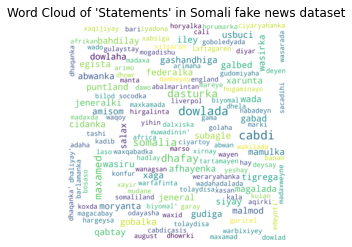

In [32]:
from wordcloud import STOPWORDS, WordCloud
import numpy as np
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = df['lines'].values
wordcloud = WordCloud(max_words=2000, width=2000, height=2000,max_font_size = 110,
                          collocations = False, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of 'Statements' in Somali fake news dataset")
plt.show()

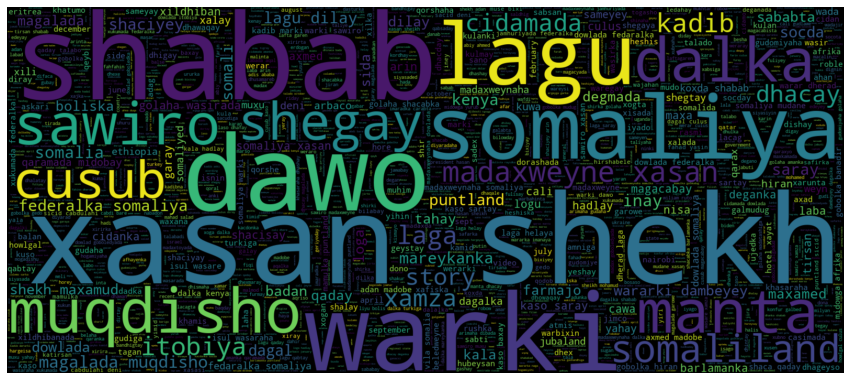

In [33]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["Lable"] == 1]
all_words = ' '.join([text for text in fake_data.lines])

wordcloud = WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Word Cloud of somali news in the dataset')

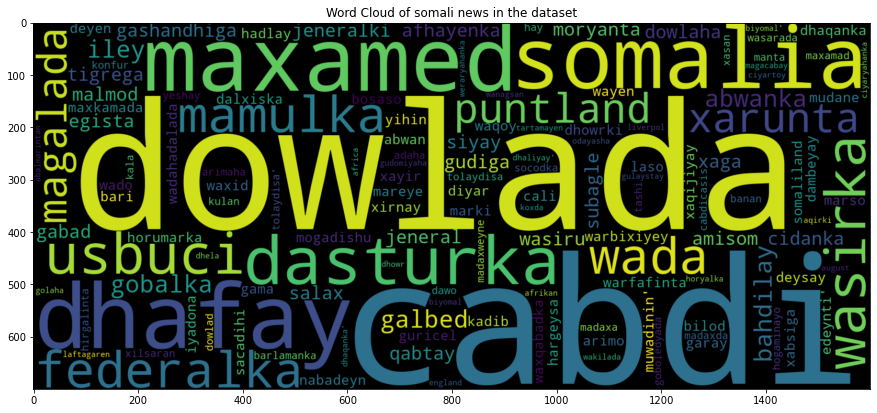

In [34]:
plt.figure(figsize=(15,15))
text = df['lines'].values
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.title("Word Cloud of somali news in the dataset")

In [35]:
#randomaly shuffle datafream
df = df.sample(frac = 1)
df.head()

,lines,Lable
8319,warsaxafaded xalada qaxotiga somaliya sugan da...,0
9101,jimco september dowlada fedaralka somaliya sha...,1
4355,madaxweyne farmajo qatay anki adka january hared,0
637,wararki dambeyey dagal socda gedo,1
7980,taxanaha jajusinta ethiopia kuma raisulwasare ...,0


# Training the model 

In [36]:
x_train,x_test,y_train,y_test = train_test_split(df['lines'],df['Lable'], test_size=0.20, random_state=20)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [37]:
y_test.value_counts()

0    1245
1     577
Name: Lable, dtype: int64

In [38]:
y_train.value_counts()

0    4949
1    2337
Name: Lable, dtype: int64

In [39]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Comparing Different Models with TF-IDF

# Naive Bayes with TF-IDF

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dct = dict()
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model_NB_tfidf = pipe.fit(x_train, y_train)

prediction = model_NB_tfidf.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)
print (classification_report(y_test, prediction))

Accuracy: 78.32%
precision: 95.96%
Recall: 32.93%
F1 score: 49.03%
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1245
           1       0.96      0.33      0.49       577

    accuracy                           0.78      1822
   macro avg       0.86      0.66      0.68      1822
weighted avg       0.82      0.78      0.74      1822



Confusion matrix, without normalization


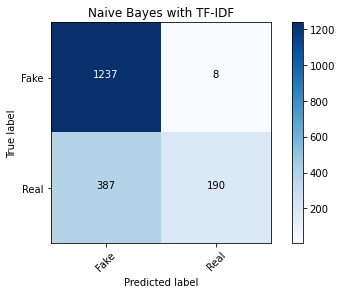

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Naive Bayes with TF-IDF")

# Logistic Regression with TF-IDF

In [42]:
# Vectorizing and applying TF-IDF
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model_LR_tfidf = pipe.fit(x_train, y_train)
# Prediction the model
prediction = model_LR_tfidf.predict(x_test)

# Accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
print (classification_report(y_test, prediction))

accuracy: 89.9%
precision: 93.57%
recall: 73.14%
f1_score: 82.1%
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1245
           1       0.94      0.73      0.82       577

    accuracy                           0.90      1822
   macro avg       0.91      0.85      0.88      1822
weighted avg       0.90      0.90      0.90      1822



Confusion matrix, without normalization


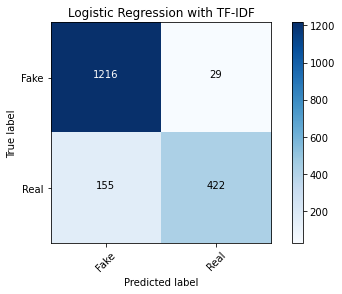

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Logistic Regression with TF-IDF")

# Random Forest with TF-IDF

In [44]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model_RF_tfidf = pipe.fit(x_train, y_train)
prediction = model_RF_tfidf.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)
print (classification_report(y_test, prediction))

accuracy: 95.28%
precision: 95.38%
recall: 89.43%
f1_score: 92.31%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1245
           1       0.95      0.89      0.92       577

    accuracy                           0.95      1822
   macro avg       0.95      0.94      0.94      1822
weighted avg       0.95      0.95      0.95      1822



Confusion matrix, without normalization


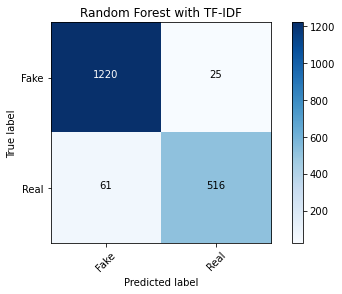

In [45]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Random Forest with TF-IDF")

# Support Vector Machine (SVM) with TF-IDF

In [46]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model_SVM_tfidf = pipe.fit(x_train, y_train)
prediction = model_SVM_tfidf.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)
print (classification_report(y_test, prediction))

accuracy: 92.1%
precision: 91.4%
recall: 82.84%
f1_score: 86.91%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1245
           1       0.91      0.83      0.87       577

    accuracy                           0.92      1822
   macro avg       0.92      0.90      0.91      1822
weighted avg       0.92      0.92      0.92      1822



Confusion matrix, without normalization


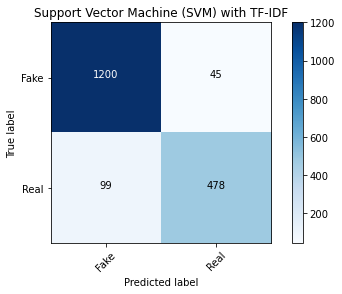

In [47]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Support Vector Machine (SVM) with TF-IDF")

# Decision Tree with TF-IDF

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model_DT_tfidf = pipe.fit(x_train, y_train)

# Accuracy
prediction = model_DT_tfidf.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)
print (classification_report(y_test, prediction))

accuracy: 86.55%
precision: 72.13%
recall: 93.76%
f1_score: 81.54%
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1245
           1       0.72      0.94      0.82       577

    accuracy                           0.87      1822
   macro avg       0.84      0.88      0.85      1822
weighted avg       0.89      0.87      0.87      1822



Confusion matrix, without normalization


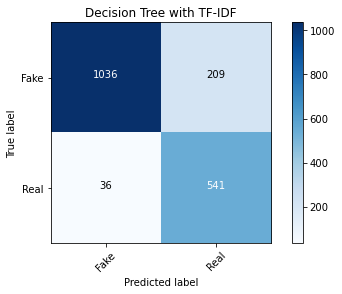

In [49]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Decision Tree with TF-IDF")

# overall Comparing Different Models with TF-IDF

In [50]:
dct.values()

dict_values([78.32, 89.9, 95.28, 92.1, 86.55])

([<matplotlib.axis.YTick at 0x233c5cdc760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

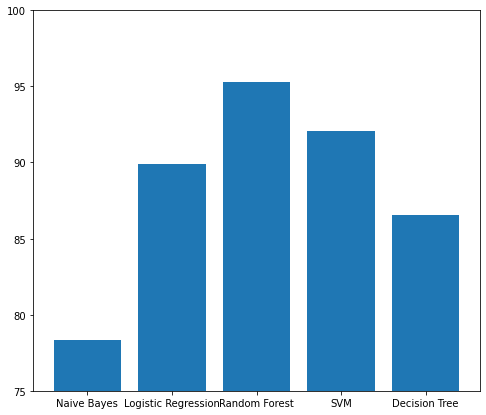

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((75, 80, 85, 90, 95, 100))

# Comparing Different Models with Word2Vec

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
#x_train,x_test,y_train,y_test = train_test_split(df['lines'], df['Lable'], test_size=0.30, random_state=2020)

In [54]:
# Train the Word2Vec model

from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in x_train]
w2v_model = Word2Vec(sentences, window=5, min_count=9, workers=4)

In [55]:
# Vectorize the text data
import numpy as np
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in x_train]
w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4)

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

x_train= np.array([vectorize(sentence) for sentence in x_train])
x_test = np.array([vectorize(sentence) for sentence in x_test])

In [56]:
# Train a classification model
dct_w2v = dict()
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Evaluate the model
y_pred = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive',average='weighted'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
dct_w2v['Logistic Regression'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 0.7628979143798024
Precision: 0.7594479159036212
Recall: 0.7628979143798024
F1 score: 0.7369016741766511
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      1245
           1       0.74      0.38      0.51       577

    accuracy                           0.76      1822
   macro avg       0.76      0.66      0.67      1822
weighted avg       0.76      0.76      0.74      1822



Confusion matrix, without normalization


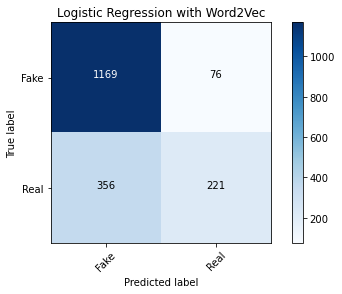

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Logistic Regression with Word2Vec")


In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [59]:
# Evaluate the model

y_pred = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive',average='weighted'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))
dct_w2v['DecisionTreeClassifier'] = round(accuracy_score(y_test, y_pred)*100,2)


Accuracy: 0.7354555433589463
Precision: 0.7372192851145132
Recall: 0.7354555433589463
F1 score: 0.7362930937900041
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1245
           1       0.58      0.59      0.59       577

    accuracy                           0.74      1822
   macro avg       0.70      0.70      0.70      1822
weighted avg       0.74      0.74      0.74      1822



Confusion matrix, without normalization


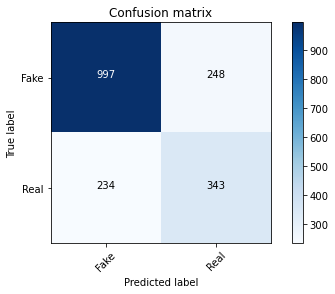

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the model
y_pred = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive',average='weighted'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
dct_w2v['RandomForestClassifier'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 0.8062568605927553
Precision: 0.8016487022729635
Recall: 0.8062568605927553
F1 score: 0.7970580922894119
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1245
           1       0.76      0.56      0.65       577

    accuracy                           0.81      1822
   macro avg       0.79      0.74      0.76      1822
weighted avg       0.80      0.81      0.80      1822



Confusion matrix, without normalization


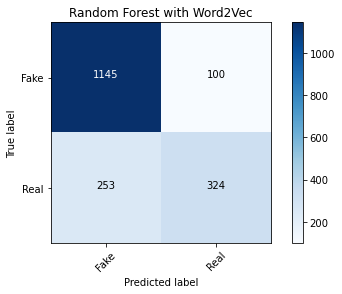

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Random Forest with Word2Vec")

In [63]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)

# Evaluate the model
y_pred = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive',average='weighted'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
dct_w2v['svm'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 0.7722283205268935
Precision: 0.806410706504916
Recall: 0.7722283205268935
F1 score: 0.7308368162566933
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1245
           1       0.92      0.31      0.46       577

    accuracy                           0.77      1822
   macro avg       0.84      0.65      0.66      1822
weighted avg       0.81      0.77      0.73      1822



Confusion matrix, without normalization


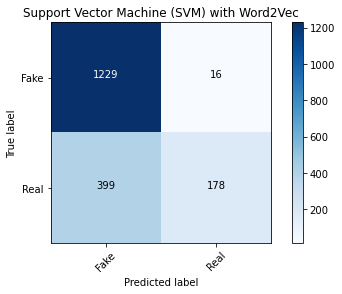

In [64]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Support Vector Machine (SVM) with Word2Vec")


In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()
NB=clf.fit(x_train,y_train)
y_pred=NB.predict(x_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive',average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive',average='weighted'))
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))
dct_w2v['MultinomialNB'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 0.6317233809001098
Precision: 0.6819868486874877
Recall: 0.6317233809001098
F1 score: 0.644154059906753
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1245
           1       0.44      0.65      0.53       577

    accuracy                           0.63      1822
   macro avg       0.62      0.64      0.61      1822
weighted avg       0.68      0.63      0.64      1822



Confusion matrix, without normalization


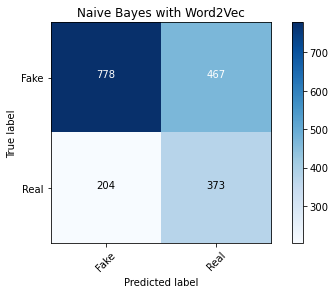

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])
title= plt.title("Naive Bayes with Word2Vec") 

In [67]:
#dct = dict()
dct_w2v.values()

dict_values([76.29, 73.55, 80.63, 77.22, 63.17])

([<matplotlib.axis.YTick at 0x233c197f040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

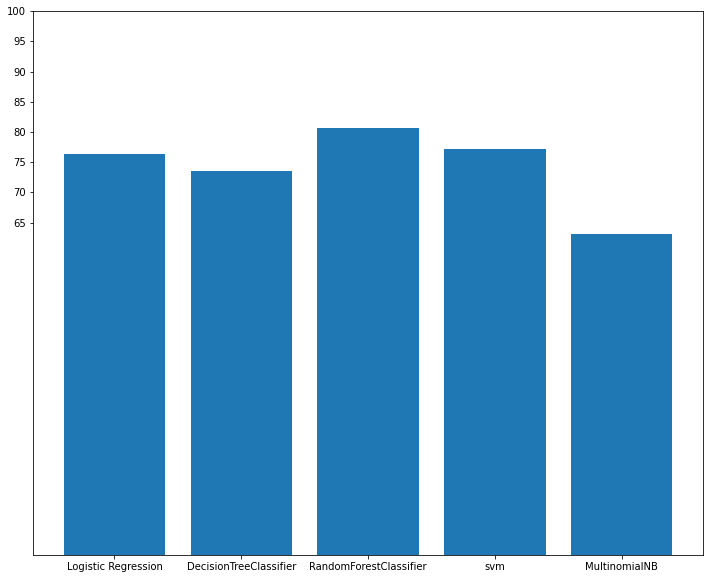

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.bar(list(dct_w2v.keys()),list(dct_w2v.values()))
plt.ylim(10,20)
plt.yticks((65,70,75,80,85,90,95,100))

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [70]:
#y_pred = model.predict_proba(x_test)[:, 1]

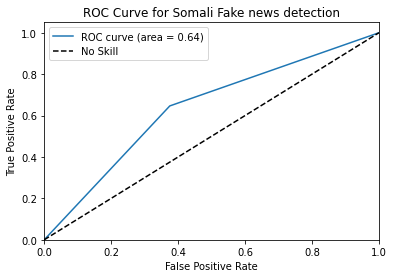

In [71]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Somali Fake news detection')
plt.legend()
plt.show()

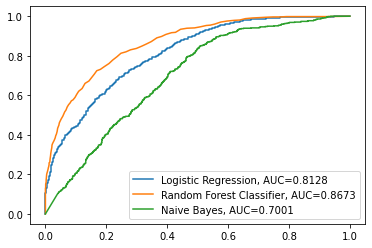

In [72]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Random ForestClassifier model and plot ROC curve
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

#fit Random ForestClassifier model and plot ROC curve
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

#add legend
plt.legend()

# ************ END ***************************

In [73]:
import pickle
#pickling the model into disk
pickle.dump(model_RF_tfidf,open('model.pkl', 'wb'))


In [74]:
from sklearn.ensemble import RandomForestClassifier
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

In [75]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(to_lowercase)
    new_def_test['text'] = new_def_test['text'].apply(remove_links)
    new_def_test['text'] = new_def_test['text'].apply(remove_com)
    new_def_test['text'] = new_def_test['text'].apply(preprocessing)
    new_x_test = new_def_test["text"]
    #transform the news
    #pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
    #model = pipe.fit(x_train, y_train)
    
    prediction = model_RF_tfidf.predict(new_x_test)
    #print (classification_report(y_test, prediction))
    return print("\n\nLR Predicition: {} ".format(output_lable(prediction[0])))

In [76]:
news = str(input()) 
manual_testing(news)



Maamulka Jubaland ayaa soo saaray liiska xubnaha guddiga doorashada ee doorashada xilli maamulku doonayo inuu qabsado doorasho u gaar iyadoo ay dowladda federalkuna doonaysay in la mideeyo doorashooyinka heer federal iyo maamul goboleed ee ka dhacaysa dalka.


LR Predicition: Fake News 
